# 16.0 Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np

chess = pd.read_csv("../assets/chess.csv", sep=',')

## 16.1 Split data

In [2]:
from sklearn.model_selection import train_test_split

# Split dataset into a training (70%) and testing set (30%)
# Based on random 'seed' 42 and equally divides species across both datasets
chessTrainSet, chessTestSet = train_test_split(chess, test_size=0.3, random_state=42, stratify=chess['winner'])
print(chessTrainSet.shape, chessTestSet.shape)

(14040, 16) (6018, 16)


## 16.2 Train model

In [3]:
from sklearn.tree import DecisionTreeClassifier

features= ['white_rating', 'black_rating','turns']
dt_classification = DecisionTreeClassifier(max_depth=10) # Increase max_depth to see effect in the plot
dt_classification.fit(chessTrainSet[features], chessTrainSet['winner'])

DecisionTreeClassifier(max_depth=10)

## 16.3 Evaluate trained model

In [4]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [5]:
predictionsOnTrainset = dt_classification.predict(chessTrainSet[features])
predictionsOnTestset = dt_classification.predict(chessTestSet[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, chessTrainSet['winner'])
accuracyTest = calculate_accuracy(predictionsOnTestset, chessTestSet['winner'])

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.6852564102564103
Accuracy on test set 0.6010302426055167


### 16.3.1 Observeringen
- De nauwkeurigheid van de test set is lager. Dit is logisch omdat je de winst vaak niet enkel kan bepalen aan de hand van de rating van beide spelers en het aantal zetten. Shaken kent namelijk veel variabelen die de uitkomst van een pot bepalen

## 16.4 Plot DecisionTreeClassifier

In [6]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

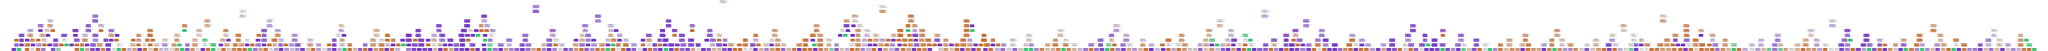

In [7]:
plot_tree_classification(dt_classification, features, np.sort(chess['winner'].unique()))